# qsm_implementation.ipynb
Author: Connacher Murphy

Implements models A and B. See documentation for a discussion of this implementation.

## 0. Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import qsm_tools as qsmt
import qsm_solver_mA as qsmA
import qsm_solver_mB as qsmB

## 1. Calibration
We create the commuting flows matrix $\mathbf{\pi}$, where $\pi_{i n}$ denotes the share of workers living in neighborhood $i$ commuting to neighborhood $n$.

In [2]:
(  # calibrate() returns objects needed for models A and B
    pi,
    pi_cond,
    residents,
    workers,
    R_bar,
    wages,
    num_nbhd,
    far_southeast_indices,
    employment_core_indices,
    neighborhoods_shp,
    theta,
    alpha,
    beta,
) = qsmt.calibrate()

## 2. Counterfactual solver
Following the notation in the writeup, I let $i$ correspond to the first index and $n$ to the second.

### 2.i. Model A

In [3]:
# Unit test
# calc_Z should return all zeros if we guess the correct wage changes
# We can set all parameter proportional changes to 1 (no changes) and check
# that a vector of unchanged wages is an equilibrium
w_tilde = np.ones((1, num_nbhd))  # use the second index to follow tilde(w)_n notation
A_hat = np.ones((1, num_nbhd))
R_hat = np.ones((num_nbhd, 1))
kappa_hat = np.ones((num_nbhd, num_nbhd))

Z = qsmA.calc_Z(w_tilde, theta, alpha, pi, residents, workers, A_hat, kappa_hat, R_hat)

print(f"Maximum absolute value of Z_i: {abs(Z).max()}")
print(f"Z nan values: {np.sum(np.isnan(Z))}")

Maximum absolute value of Z_i: 1.1102230246251565e-16
Z nan values: 0


In [4]:
# Run the unit test again, using the solve_counterfactual() function
w_hat = qsmA.solve_counterfactual(
    num_nbhd, theta, alpha, pi, residents, workers, A_hat, kappa_hat, R_hat
)

print(f"Maximum absolute value of (w_hat - 1): {abs(w_hat - 1).max()}")
print(f"w_hat nan values: {np.sum(np.isnan(w_hat))}")

Step 0 error: 0.0
Maximum absolute value of (w_hat - 1): 0.0
w_hat nan values: 0


### 2.ii. Model B

In [5]:
# Unit test
# calc_Z should return all zeros if we guess the correct wage and rent changes
# We can set all parameter proportional changes to 1 (no changes) and check
# that a vector of unchanged wages and rents is an equilibrium
w_tilde = np.ones((1, num_nbhd))  # use the second index to follow tilde(w)_n notation
q_tilde = np.ones((num_nbhd, 1))
kappa_hat = np.ones((num_nbhd, num_nbhd))
B_hat = np.ones((num_nbhd, num_nbhd))
R_bar_hat = np.ones((1, 1))
H_hat = np.ones((num_nbhd, 1))
A_hat = np.ones((1, num_nbhd))

Z = qsmB.calc_Z(
    w_tilde,
    q_tilde,
    theta,
    alpha,
    beta,
    pi,
    workers,
    R_bar,
    A_hat,
    kappa_hat,
    B_hat,
    R_bar_hat,
)

q_tilde_guess = qsmB.calc_q_hat(
    theta,
    alpha,
    pi,
    wages,
    w_tilde,
    q_tilde,
    kappa_hat,
    B_hat,
    R_bar_hat,
    H_hat,
)

print(f"Maximum absolute value of Z_i: {abs(Z).max()}")
print(f"Maximum absolute difference in rents: {abs(q_tilde - q_tilde_guess).max()}")

print(f"Z nan values: {np.sum(np.isnan(Z))}")
print(f"q_tilde nan values: {np.sum(np.isnan(q_tilde_guess))}")

Maximum absolute value of Z_i: 7.771561172376096e-16
Maximum absolute difference in rents: 6.661338147750939e-16
Z nan values: 0
q_tilde nan values: 0


In [6]:
# Run the unit test again, using the solve_counterfactual() function
w_hat, q_hat = qsmB.solve_counterfactual(
    num_nbhd,
    theta,
    alpha,
    beta,
    pi,
    wages,
    workers,
    R_bar,
    A_hat,
    kappa_hat,
    B_hat,
    R_bar_hat,
    H_hat,
)

print(f"Maximum absolute value of w_hat - 1: {abs(w_hat - 1).max()}")
print(f"Maximum absolute value of q_tilde - 1: {abs(q_hat - 1).max()}")

print(f"w_hat nan values: {np.sum(np.isnan(w_hat))}")
print(f"q_hat nan values: {np.sum(np.isnan(q_hat))}")

Step 0 error: 0.0
Maximum absolute value of w_hat - 1: 1.1102230246251565e-16
Maximum absolute value of q_tilde - 1: 0.0
w_hat nan values: 0
q_hat nan values: 0


## 3. Counterfactual exercises

### 3.i. Local productivity shock

In [7]:
A_hat[:, far_southeast_indices] = 1.05  # increase productivity by 5% in far southeast
w_hat = qsmA.solve_counterfactual(
    num_nbhd, theta, alpha, pi, residents, workers, A_hat, kappa_hat, R_hat,
)

productivity_shock_mA_shp = qsmA.summarize_counterfactual(
    num_nbhd, neighborhoods_shp, w_hat
)

Step 0 error: 0.1297263219
Step 1 error: 0.0603006826
Step 2 error: 0.0285251139
Step 3 error: 0.0136829422
Step 4 error: 0.0066695423
Step 5 error: 0.0033224206
Step 6 error: 0.0017055958
Step 7 error: 0.0009111593
Step 8 error: 0.0005111351
Step 9 error: 0.0003027803
Step 10 error: 0.000189409
Step 11 error: 0.0001244453
Step 12 error: 8.51049e-05
Step 13 error: 5.99853e-05
Step 14 error: 4.31953e-05
Step 15 error: 3.15603e-05
Step 16 error: 2.32813e-05
Step 17 error: 1.73058e-05
Step 18 error: 1.29525e-05
Step 19 error: 9.702e-06
Step 20 error: 7.2711e-06
Step 21 error: 5.4512e-06
Step 22 error: 4.0878e-06
Step 23 error: 3.0658e-06
Step 24 error: 2.2996e-06
Step 25 error: 1.725e-06
Step 26 error: 1.2941e-06
Step 27 error: 9.708e-07
Step 28 error: 7.283e-07
Step 29 error: 5.464e-07
Step 30 error: 4.099e-07
Step 31 error: 3.075e-07
Step 32 error: 2.307e-07
Step 33 error: 1.731e-07
Step 34 error: 1.299e-07
Step 35 error: 9.74e-08
Step 36 error: 7.31e-08
Step 37 error: 5.48e-08
Step 38 

In [8]:
w_hat, q_hat = qsmB.solve_counterfactual(
    num_nbhd,
    theta,
    alpha,
    beta,
    pi,
    wages,
    workers,
    R_bar,
    A_hat,
    kappa_hat,
    B_hat,
    R_bar_hat,
    H_hat,
)

productivity_shock_mB_shp = qsmB.summarize_counterfactual(
    num_nbhd, neighborhoods_shp, w_hat, q_hat
)

Step 0 error: 0.1297263219
Step 1 error: 0.055245033
Step 2 error: 0.0247329924
Step 3 error: 0.0118787025
Step 4 error: 0.0062592628
Step 5 error: 0.0036617894
Step 6 error: 0.0023617111
Step 7 error: 0.0016432314
Step 8 error: 0.0012031403
Step 9 error: 0.0009087003
Step 10 error: 0.0006986824
Step 11 error: 0.0005426069
Step 12 error: 0.0004237654
Step 13 error: 0.0003320169
Step 14 error: 0.0002606339
Step 15 error: 0.0002048514
Step 16 error: 0.0001611473
Step 17 error: 0.0001268514
Step 18 error: 9.99092e-05
Step 19 error: 7.87271e-05
Step 20 error: 6.2063e-05
Step 21 error: 4.8946e-05
Step 22 error: 3.86161e-05
Step 23 error: 3.04774e-05
Step 24 error: 2.40624e-05
Step 25 error: 1.9004e-05
Step 26 error: 1.50137e-05
Step 27 error: 1.1865e-05
Step 28 error: 9.3793e-06
Step 29 error: 7.4165e-06
Step 30 error: 5.8661e-06
Step 31 error: 4.641e-06
Step 32 error: 3.6726e-06
Step 33 error: 2.9071e-06
Step 34 error: 2.3016e-06
Step 35 error: 1.8227e-06
Step 36 error: 1.4437e-06
Step 37 

### 3.ii. Employment core transportation shock

In [9]:
# Reset A_hat
A_hat = np.ones((1, num_nbhd))

# Reduce travel costs from far Southeast to employment core by 5%
kappa_hat[far_southeast_indices.reshape(-1, 1), employment_core_indices] = 0.95

w_hat = qsmA.solve_counterfactual(
    num_nbhd, theta, alpha, pi, residents, workers, A_hat, kappa_hat, R_hat
)
transport_shock_mA_shp = qsmA.summarize_counterfactual(
    num_nbhd, neighborhoods_shp, w_hat
)

Step 0 error: 0.0495757552
Step 1 error: 0.0245300949
Step 2 error: 0.0121813999
Step 3 error: 0.006059862
Step 4 error: 0.0030174599
Step 5 error: 0.0015034772
Step 6 error: 0.0007495687
Step 7 error: 0.0003739799
Step 8 error: 0.0001867853
Step 9 error: 9.34358e-05
Step 10 error: 4.68481e-05
Step 11 error: 2.35703e-05
Step 12 error: 1.1919e-05
Step 13 error: 6.0719e-06
Step 14 error: 3.1261e-06
Step 15 error: 1.6336e-06
Step 16 error: 8.711e-07
Step 17 error: 4.77e-07
Step 18 error: 2.699e-07
Step 19 error: 1.587e-07
Step 20 error: 9.72e-08
Step 21 error: 6.2e-08
Step 22 error: 4.11e-08
Step 23 error: 2.81e-08
Step 24 error: 1.98e-08
Step 25 error: 1.41e-08
Step 26 error: 1.03e-08
Step 27 error: 7.5e-09
Step 28 error: 5.6e-09
Step 29 error: 4.1e-09
Step 30 error: 3.1e-09
Step 31 error: 2.3e-09
Step 32 error: 1.7e-09
Step 33 error: 1.3e-09
Step 34 error: 1e-09
Step 35 error: 7e-10
Step 36 error: 5e-10
Step 37 error: 4e-10
Step 38 error: 3e-10
Step 39 error: 2e-10
Step 40 error: 2e-10


In [10]:
w_hat, q_hat = qsmB.solve_counterfactual(
    num_nbhd,
    theta,
    alpha,
    beta,
    pi,
    wages,
    workers,
    R_bar,
    A_hat,
    kappa_hat,
    B_hat,
    R_bar_hat,
    H_hat,
)

transport_shock_mB_shp = qsmB.summarize_counterfactual(
    num_nbhd, neighborhoods_shp, w_hat, q_hat
)

Step 0 error: 0.0054534723
Step 1 error: 0.0085197494
Step 2 error: 0.0085092796
Step 3 error: 0.0074774635
Step 4 error: 0.0062299619
Step 5 error: 0.0050614836
Step 6 error: 0.0040609327
Step 7 error: 0.003237642
Step 8 error: 0.0025731725
Step 9 error: 0.0020420397
Step 10 error: 0.0016195214
Step 11 error: 0.0012841779
Step 12 error: 0.0010182894
Step 13 error: 0.0008075422
Step 14 error: 0.0006405033
Step 15 error: 0.0005080905
Step 16 error: 0.0004031065
Step 17 error: 0.0003198533
Step 18 error: 0.000253821
Step 19 error: 0.0002014388
Step 20 error: 0.0001598792
Step 21 error: 0.0001269024
Step 22 error: 0.0001007331
Step 23 error: 7.99644e-05
Step 24 error: 6.34805e-05
Step 25 error: 5.03966e-05
Step 26 error: 4.00109e-05
Step 27 error: 3.17665e-05
Step 28 error: 2.52217e-05
Step 29 error: 2.0026e-05
Step 30 error: 1.5901e-05
Step 31 error: 1.26261e-05
Step 32 error: 1.0026e-05
Step 33 error: 7.9615e-06
Step 34 error: 6.3223e-06
Step 35 error: 5.0207e-06
Step 36 error: 3.9872e-

In [11]:
# Shapefile lists
shp_list = [
    productivity_shock_mA_shp,
    productivity_shock_mB_shp,
    transport_shock_mA_shp,
    transport_shock_mB_shp,
]

shp_list_exclude = [  # exclude far southeast
    shp[shp["far_southeast"] == 0] for shp in shp_list
]

shp_list_focus = [  # only far southeast
    shp[shp["far_southeast"] == 1] for shp in shp_list
]


## 4. Summary

## 4.i. Shock locations

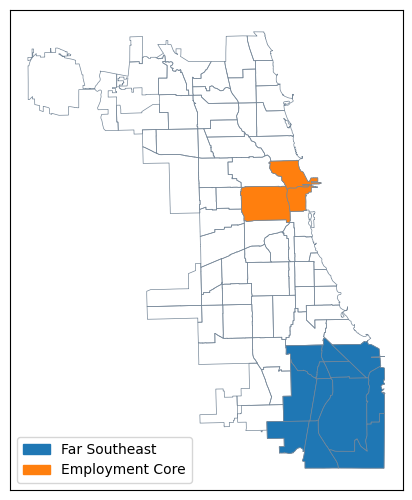

In [12]:
fig, ax = plt.subplots()

neighborhoods_shp.plot(
    facecolor="none", edgecolor="lightslategray", linewidth=0.5, ax=ax
)

neighborhoods_shp[neighborhoods_shp["far_southeast"] == 1].plot(
    label="Far Southeast",
    legend=True,
    facecolor="tab:blue",
    edgecolor="lightslategray",
    linewidth=0.5,
    ax=ax,
)

neighborhoods_shp[neighborhoods_shp["employment_core"] == 1].plot(
    label="Employment Core",
    legend=True,
    facecolor="tab:orange",
    edgecolor="lightslategray",
    linewidth=0.5,
    ax=ax,
)

# Create legend patches
patch1 = mpatches.Patch(color="tab:blue", label="Far Southeast")
patch2 = mpatches.Patch(color="tab:orange", label="Employment Core")

# Add legend to the plot
plt.legend(handles=[patch1, patch2], loc="lower left")

# Finaly styling
plt.xticks([])
plt.yticks([])
plt.tight_layout(pad=0)
plt.savefig("../out/shock_map.png", bbox_inches="tight")
plt.show()

### 4.ii. Wages

In [ ]:
panel_titles = [
    "Panel A. Productivity Shock (Model A)",
    "Panel B. Productivity Shock (Model B)",
    "Panel C. Transport Cost Shock (Model A)",
    "Panel D. Transport Cost Shock (Model B)",
]

filenames = ["prod_mA", "prod_mB", "trans_mA", "trans_mB"]

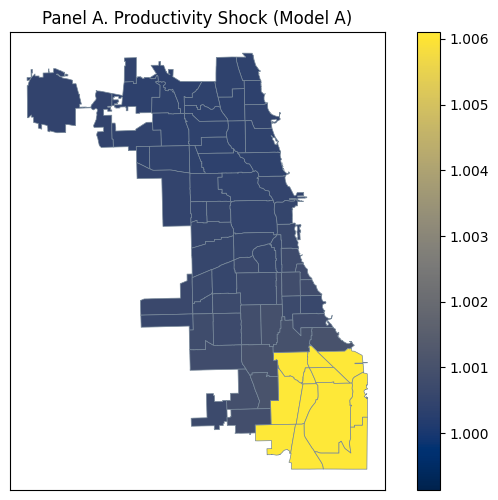

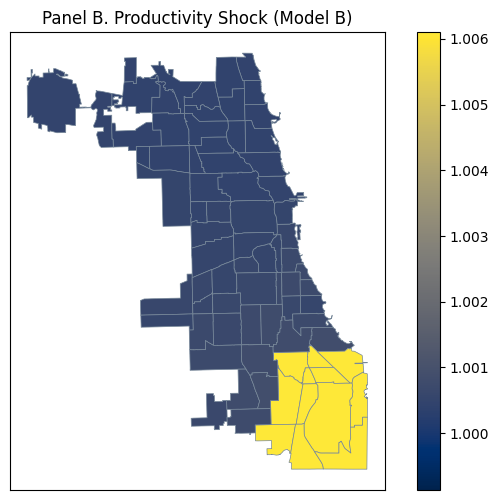

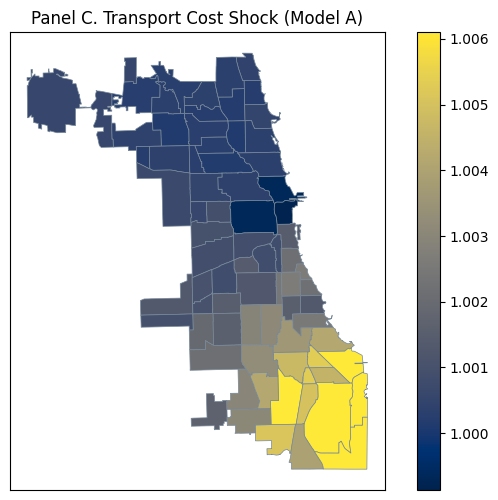

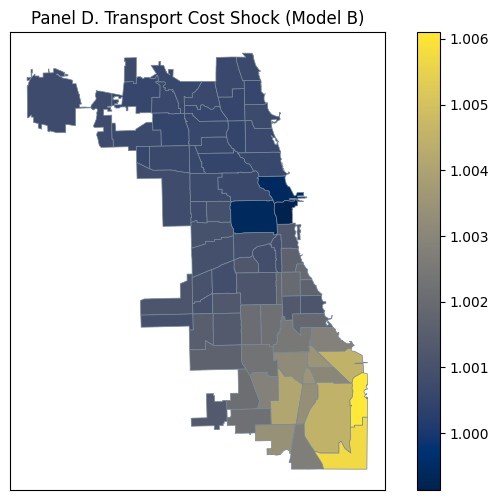

In [13]:
qsmt.compare_maps(shp_list, "w_hat", panel_titles, filenames)

In [14]:
# Plot the shock (A_hat)
# productivity_shock_shp.plot(
#     column="A_hat",
#     legend=True,
#     edgecolor="lightslategray",
#     linewidth=0.5,
#     cmap="inferno",
# )
# plt.xticks([])
# plt.yticks([])
# plt.tight_layout(pad=0)
# plt.savefig("../out/prod.png", bbox_inches="tight")
# plt.show()
# cividis

In [15]:
# # Onto the endogenous variables
# # w_hat (all neighborhoods)
# productivity_shock_shp.plot(
#     column="w_hat",
#     legend=True,
#     edgecolor="lightslategray",
#     linewidth=0.5,
#     vmin=1.000,
#     vmax=1.025,
#     cmap="inferno",
# )
# plt.xticks([])
# plt.yticks([])
# plt.title("Model A")
# plt.tight_layout(pad=0)
# plt.savefig("../out/prod_mA_w_hat_all.png", bbox_inches="tight")
# plt.show()

# # w_hat (exclude far southeast)
# fig, ax = plt.subplots()

# # Full boundaries
# productivity_shock_shp.plot(
#     facecolor="none", edgecolor="lightslategray", linewidth=0.5, ax=ax
# )
# productivity_shock_shp[productivity_shock_shp["far_southeast"] == 0].plot(
#     column="w_hat",
#     legend=True,
#     edgecolor="lightslategray",
#     linewidth=0.5,
#     ax=ax,
#     vmin=1.0003,
#     vmax=1.0011,
#     cmap="inferno",
# )
# plt.xticks([])
# plt.yticks([])
# plt.title("Model A")
# plt.tight_layout(pad=0)
# plt.savefig("../out/prod_mA_w_hat_excl.png", bbox_inches="tight")
# plt.show()

# # w_hat (only far southeast)
# productivity_shock_shp[productivity_shock_shp['far_southeast'] == 1].plot(
#     column="w_hat",
#     legend=True,
#     edgecolor="lightslategray",
#     linewidth=0.5,
#     vmin=1.023,
#     vmax=1.025,
#     cmap="inferno",
# )
# plt.xticks([])
# plt.yticks([])
# plt.title("Model A")
# plt.tight_layout(pad=0)
# plt.savefig("../out/prod_mA_w_hat_fse.png", bbox_inches="tight")
# plt.show()

In [16]:
# # Plot the shock (kappa_hat)
# fig, ax = plt.subplots()

# transport_shock_shp.plot(
#     column="kappa_hat",
#     legend=True,
#     edgecolor="lightslategray",
#     linewidth=0.5,
#     cmap="inferno",
#     ax=ax,
# )
# transport_shock_shp[transport_shock_shp["far_southeast"] == 1].plot(
#     facecolor="none", edgecolor="black", linewidth=0.5, ax=ax
# )

# plt.xticks([])
# plt.yticks([])
# plt.tight_layout(pad=0)
# plt.savefig("../out/trans.png", bbox_inches="tight")
# plt.show()

In [17]:
# # Onto the endogenous variables
# # w_hat (all neighborhoods)
# transport_shock_shp.plot(
#     column="w_hat",
#     legend=True,
#     edgecolor="lightslategray",
#     linewidth=0.5,
#     vmin=0.999,
#     vmax=1.010,
#     cmap="inferno",
# )
# plt.xticks([])
# plt.yticks([])
# plt.title("Model A")
# plt.tight_layout(pad=0)
# plt.savefig("../out/trans_mA_w_hat_all.png", bbox_inches="tight")
# plt.show()

# # w_hat (exclude far southeast)
# fig, ax = plt.subplots()

# # Full boundaries
# transport_shock_shp.plot(
#     facecolor="none", edgecolor="lightslategray", linewidth=0.5, ax=ax
# )
# transport_shock_shp[transport_shock_shp["far_southeast"] == 0].plot(
#     column="w_hat",
#     legend=True,
#     edgecolor="lightslategray",
#     linewidth=0.5,
#     ax=ax,
#     vmin=0.999,
#     vmax=1.004,
#     cmap="inferno",
# )
# plt.xticks([])
# plt.yticks([])
# plt.title("Model A")
# plt.tight_layout(pad=0)
# plt.savefig("../out/trans_mA_w_hat_excl.png", bbox_inches="tight")
# plt.show()

# # w_hat (only far southeast)
# transport_shock_shp[transport_shock_shp['far_southeast'] == 1].plot(
#     column="w_hat",
#     legend=True,
#     edgecolor="lightslategray",
#     linewidth=0.5,
#     vmin=1.003,
#     vmax=1.010,
#     cmap="inferno",
# )
# plt.xticks([])
# plt.yticks([])
# plt.title("Model A")
# plt.tight_layout(pad=0)
# plt.savefig("../out/trans_mA_w_hat_fse.png", bbox_inches="tight")
# plt.show()

# # w_hat (only employment core)
# transport_shock_shp[transport_shock_shp['employment_core'] == 1].plot(
#     column="w_hat",
#     legend=True,
#     edgecolor="lightslategray",
#     linewidth=0.5,
#     vmin=0.9991,
#     vmax=0.9994,
#     cmap="inferno",
# )
# plt.xticks([])
# plt.yticks([])
# plt.title("Model A")
# plt.tight_layout(pad=0)
# plt.savefig("../out/trans_mA_w_hat_core.png", bbox_inches="tight")
# plt.show()